# Getting and Exploring the data

## Market by price (MBP-10) of SOUN, FROG, CRWV for a month

The MBP-10 gives the 10 best prices of the bids (10 highest) and ask (10 lowest) at the current time.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")



In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_CRWV_2025Apr03 = pd.read_csv('/content/drive/MyDrive/Blockhouse_Trial/Unzipped_CRWV/CRWV_2025-04-03 00:00:00+00:00.csv')
display(data_CRWV_2025Apr03.head())
display(data_CRWV_2025Apr03.describe())
display(data_CRWV_2025Apr03.columns)

,ts_event,ts_event.1,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
0,2025-04-03 13:30:00.012155347+00:00,2025-04-03 13:30:00.012155347+00:00,10,2,20613,T,B,0,55.40,99,0,260347,62279183,55.10,55.40,1,199,1,2,55.06,55.46,1667,10,1,1,55.03,55.47,200,100,1,1,55.00,55.50,80,100,2,1,54.98,55.93,20,50,2,1,54.80,56.00,10,200,1,1,54.78,56.24,100,3,1,1,54.66,56.45,1,5,1,1,54.57,56.66,400,4,1,1,54.55,56.70,100,10,1,1,CRWV
1,2025-04-03 13:30:00.012155347+00:00,2025-04-03 13:30:00.012155347+00:00,10,2,20613,T,B,0,55.40,100,0,260347,62279184,55.10,55.40,1,100,1,1,55.06,55.46,1667,10,1,1,55.03,55.47,200,100,1,1,55.00,55.50,80,100,2,1,54.98,55.93,20,50,2,1,54.80,56.00,10,200,1,1,54.78,56.24,100,3,1,1,54.66,56.45,1,5,1,1,54.57,56.66,400,4,1,1,54.55,56.70,100,10,1,1,CRWV
2,2025-04-03 13:30:00.012155347+00:00,2025-04-03 13:30:00.012155347+00:00,10,2,20613,T,N,0,55.40,551,128,260347,62279185,55.10,55.46,1,10,1,1,55.06,55.47,1667,100,1,1,55.03,55.50,200,100,1,1,55.00,55.93,80,50,2,1,54.98,56.00,20,200,2,1,54.80,56.24,10,3,1,1,54.78,56.45,100,5,1,1,54.66,56.66,1,4,1,1,54.57,56.70,400,10,1,1,54.55,56.91,100,100,1,1,CRWV
3,2025-04-03 13:30:00.012344442+00:00,2025-04-03 13:30:00.012344442+00:00,10,2,20613,A,A,0,55.40,100,128,303995,62279528,55.10,55.40,1,100,1,1,55.06,55.46,1667,10,1,1,55.03,55.47,200,100,1,1,55.00,55.50,80,100,2,1,54.98,55.93,20,50,2,1,54.80,56.00,10,200,1,1,54.78,56.24,100,3,1,1,54.66,56.45,1,5,1,1,54.57,56.66,400,4,1,1,54.55,56.70,100,10,1,1,CRWV
4,2025-04-03 13:30:00.012800457+00:00,2025-04-03 13:30:00.012800457+00:00,10,2,20613,A,B,0,55.39,100,128,167284,62279871,55.39,55.40,100,100,1,1,55.10,55.46,1,10,1,1,55.06,55.47,1667,100,1,1,55.03,55.50,200,100,1,1,55.00,55.93,80,50,2,1,54.98,56.00,20,200,2,1,54.80,56.24,10,3,1,1,54.78,56.45,100,5,1,1,54.66,56.66,1,4,1,1,54.57,56.70,400,10,1,1,CRWV


,rtype,publisher_id,instrument_id,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09
count,189869.0,189869.0,189869.0,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,1.898690e+05,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.00000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.00000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000,189869.000000
mean,10.0,2.0,20613.0,0.958456,53.172743,109.543059,119.542400,167775.103540,5.655697e+08,53.120584,53.221674,409.096840,363.004656,3.566996,2.114221,53.083887,53.276191,328.910128,274.973877,2.743470,1.525483,53.051128,53.325945,321.214090,267.27588,2.674828,1.470208,53.018595,53.375167,287.754331,275.798614,2.482090,1.483075,52.986954,53.423860,277.556110,297.601546,2.357088,1.493809,52.955680,53.473252,288.600029,281.196988,2.430402,1.480500,52.926199,53.523657,320.390780,331.308771,2.912745,1.497338,52.897387,53.574666,291.072345,288.425530,2.523340,1.562993,52.868435,53.625407,309.316940,296.689001,2.73794,1.599071,52.839051,53.677161,301.096124,307.614371,2.600425,1.620675
std,0.0,0.0,0.0,1.890363,2.079399,507.381267,35.165039,11555.488239,3.027080e+08,2.073607,2.082206,1543.237239,867.873851,18.758050,1.908241,2.070934,2.085623,1263.709916,824.283413,11.228126,1.155564,2.069538,2.089248,1261.428886,831.36380,11.969376,1.169501,2.067627,2.092526,1038.613136,776.789360,8.023651,1.262890,2.066011,2.094449,1017.836299,838.632570,7.755908,1.450738,2.065786,2.095880,1151.344027,777.676391,10.072562,1.434479,2.064725,2.098119,1509.110903,1002.849795,18.738985,1.516685,2.063862,2.100379,1198.407071,759.120667,11.362805,1.870392,2.063227,2.102307,1263.873115,811.543725,12.63826,2.011781,2.063120,2.101914,1121.359283,858.141838,8.489314,1.988830
min,10.0,2.0,20613.0,0.000000,42.790000,1.000000,0.000000,165202.000000,6.227918e+07,48.250000,48.290000,1.000000,1.000000,1.000000,1.000000,48.240000,48.300000,1.000000,1.000000,1.000000,1.000000,48.230000,48.310000,1.000000,1.00000,1.000000,1.000000,48.200000,48.320000,1.000000,1.000000,1.000000,1.000000,48.180000,48.340000,1.000000,1.000000,1.000000,1.000000,48.150000,48.390000,1.000000,1.000000,1.000000,1.000000,48.140000,48.500000,1.000000,1.000000,1.000000,1.000000,48.130000,48.510000,1.000000,1.000000,1.000000,1.000000,48.120000,48.560000,1.000000,1.000000,1.00000,1.000000,48.110000,48.570000,1.000000,1.000000,1.000000,1.000000
25%,10.0,2.0,20613.0,0.000000,51.530000,16.000000,130.000000,166025.000000,3.369522e+08,51.500000,51.570000,34.000000,58.000000,1.000000,1.000000,51.470000,51.610000,26.000000,45.000000,1.000000,1.000000,51.420000,51.690000,21.000000,42.00000,1.000000,1.000000,51.400000,51.760000,20.000000,38.000000,1.000000,1.000000,51.350000,51.800000,18.000000,36.000000,1

Index(['ts_event', 'ts_event.1', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'depth', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01',
       'ask_sz_01', 'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02',
       'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03',
       'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
       'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04',
       'ask_ct_04', 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
       'bid_ct_05', 'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06',
       'ask_sz_06', 'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07',
       'bid_sz_07', 'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08',
       'ask_px_08', 'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08',
       'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09', 

# Data Preprocessing

## Midprice

,ts_event,ts_event.1,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,mid_price,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
0,2025-04-03 13:30:00.012155347+00:00,2025-04-03 13:30:00.012155347+00:00,10,2,20613,T,B,0,55.40,99,0,260347,62279183,55.250,55.10,55.40,1,199,1,2,55.06,55.46,1667,10,1,1,55.03,55.47,200,100,1,1,55.00,55.50,80,100,2,1,54.98,55.93,20,50,2,1,54.80,56.00,10,200,1,1,54.78,56.24,100,3,1,1,54.66,56.45,1,5,1,1,54.57,56.66,400,4,1,1,54.55,56.70,100,10,1,1,CRWV
1,2025-04-03 13:30:00.012155347+00:00,2025-04-03 13:30:00.012155347+00:00,10,2,20613,T,B,0,55.40,100,0,260347,62279184,55.250,55.10,55.40,1,100,1,1,55.06,55.46,1667,10,1,1,55.03,55.47,200,100,1,1,55.00,55.50,80,100,2,1,54.98,55.93,20,50,2,1,54.80,56.00,10,200,1,1,54.78,56.24,100,3,1,1,54.66,56.45,1,5,1,1,54.57,56.66,400,4,1,1,54.55,56.70,100,10,1,1,CRWV
2,2025-04-03 13:30:00.012155347+00:00,2025-04-03 13:30:00.012155347+00:00,10,2,20613,T,N,0,55.40,551,128,260347,62279185,55.280,55.10,55.46,1,10,1,1,55.06,55.47,1667,100,1,1,55.03,55.50,200,100,1,1,55.00,55.93,80,50,2,1,54.98,56.00,20,200,2,1,54.80,56.24,10,3,1,1,54.78,56.45,100,5,1,1,54.66,56.66,1,4,1,1,54.57,56.70,400,10,1,1,54.55,56.91,100,100,1,1,CRWV
3,2025-04-03 13:30:00.012344442+00:00,2025-04-03 13:30:00.012344442+00:00,10,2,20613,A,A,0,55.40,100,128,303995,62279528,55.250,55.10,55.40,1,100,1,1,55.06,55.46,1667,10,1,1,55.03,55.47,200,100,1,1,55.00,55.50,80,100,2,1,54.98,55.93,20,50,2,1,54.80,56.00,10,200,1,1,54.78,56.24,100,3,1,1,54.66,56.45,1,5,1,1,54.57,56.66,400,4,1,1,54.55,56.70,100,10,1,1,CRWV
4,2025-04-03 13:30:00.012800457+00:00,2025-04-03 13:30:00.012800457+00:00,10,2,20613,A,B,0,55.39,100,128,167284,62279871,55.395,55.39,55.40,100,100,1,1,55.10,55.46,1,10,1,1,55.06,55.47,1667,100,1,1,55.03,55.50,200,100,1,1,55.00,55.93,80,50,2,1,54.98,56.00,20,200,2,1,54.80,56.24,10,3,1,1,54.78,56.45,100,5,1,1,54.66,56.66,1,4,1,1,54.57,56.70,400,10,1,1,CRWV


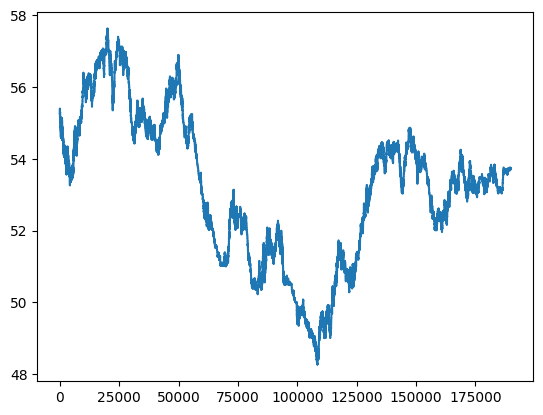

In [4]:
# Creating the midprice column using the average of the best ask and bid
# And then reordering the column to appear in front of the asks and bids
data_CRWV_2025Apr03['mid_price'] = (data_CRWV_2025Apr03['ask_px_00']+data_CRWV_2025Apr03['bid_px_00'])/2.0
mid_price = data_CRWV_2025Apr03.pop('mid_price')
data_CRWV_2025Apr03.insert(13, 'mid_price', mid_price)
display(data_CRWV_2025Apr03.head())

# Just a sanity check of the midprice
data_CRWV_2025Apr03['mid_price'].plot()
plt.show()

## Resampling

Our MBP data provides the market data at an extremely high frequency (with $189869$ events alone in the CRWV data on 04/03/2025), while our trading is splitting the day in 390 periods (the number of minutes in the regular trading day). So we will reduce the size of our data to 390, keeping only the last row of every minute interval, since that is final state in every minute.

In [5]:
data_CRWV_2025Apr03['ts'] = pd.to_datetime(data_CRWV_2025Apr03['ts_event'])
data_CRWV_2025Apr03.set_index('ts', inplace=True)
minute_data_CRWV_2025Apr03 = data_CRWV_2025Apr03.groupby(data_CRWV_2025Apr03.index.floor('1min')).last()
display(minute_data_CRWV_2025Apr03)

,ts_event,ts_event.1,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,mid_price,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-04-03 13:30:00+00:00,2025-04-03 13:30:59.476216969+00:00,2025-04-03 13:30:59.476216969+00:00,10,2,20613,A,B,0,54.50,1,130,166055,70202521,54.580,54.50,54.66,726,5,8,1,54.49,54.70,8,570,1,5,54.48,54.78,57,100,2,1,54.47,54.84,100,100,1,1,54.45,54.96,1,39,1,1,54.40,55.05,1160,940,1,1,54.36,55.12,200,2,1,1,54.34,55.17,1,20,1,1,54.30,55.20,205,200,3,2,54.25,55.23,118,10,3,1,CRWV
2025-04-03 13:31:00+00:00,2025-04-03 13:31:59.735970163+00:00,2025-04-03 13:31:59.735970163+00:00,10,2,20613,C,A,1,53.79,100,130,166249,74647870,53.400,53.24,53.56,1,200,1,2,53.23,53.97,18,100,1,1,53.20,54.00,620,102,3,3,53.18,54.25,1000,100,2,1,53.15,54.47,1004,1000,2,1,53.14,54.50,263,200,1,1,53.13,54.99,10,1000,1,1,53.05,55.00,200,2165,1,2,53.02,55.05,50,940,1,1,53.01,55.17,710,20,2,1,CRWV
2025-04-03 13:32:00+00:00,2025-04-03 13:32:59.748989604+00:00,2025-04-03 13:32:59.748989604+00:00,10,2,20613,T,N,0,53.46,100,130,166911,78879816,53.460,53.40,53.52,105,385,2,3,53.37,53.75,1000,100,1,1,53.35,53.79,192,100,2,1,53.30,53.97,58,100,2,1,53.28,54.00,10,107,1,3,53.27,54.25,105,100,2,1,53.25,54.50,37,200,4,1,53.23,54.99,51,1005,2,2,53.20,55.00,620,15,3,2,53.18,55.17,1000,20,2,1,CRWV
2025-04-03 13:33:00+00:00,2025-04-03 13:33:59.739494795+00:00,2025-04-03 13:33:59.739494795+00:00,10,2,20613,C,B,2,54.50,19,130,166431,82903627,54.575,54.57,54.58,20,2000,1,1,54.55,54.71,100,100,1,1,54.50,54.78,2721,267,5,1,54.49,54.97,5,100,1,1,54.42,55.00,4,10,1,1,54.40,55.17,101,20,2,1,54.31,55.20,1005,100,3,1,54.25,55.25,100,1410,1,1,54.24,55.30,5400,85,1,1,54.20,55.35,370,4,2,1,CRWV
2025-04-03 13:34:00+00:00,2025-04-03 13:34:59.444900660+00:00,2025-04-03 13:34:59.444900660+00:00,10,2,20613,A,B,0,54.60,28,130,166569,86860092,54.655,54.60,54.71,28,300,1,3,54.56,54.75,78,100,4,1,54.51,54.80,100,350,1,2,54.50,54.97,110,100,2,1,54.43,55.00,360,43,1,3,54.40,55.17,109,20,2,1,54.34,55.20,200,100,1,1,54.30,55.25,605,1410,4,1,54.28,55.30,5,85,1,1,54.25,55.35,155,4,2,1,CRWV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-03 19:55:00+00:00,2025-04-03 19:55:59.689715811+00:00,2025-04-03 19:55:59.689715811+00:00,10,2,20613,C,A,4,53.45,100,130,166334,1139724447,53.250,53.24,53.26,306,201,3,4,53.22,53.27,200,75,2,4,53.21,53.29,200,100,2,1,53.20,53.35,100,100,1,1,53.17,53.49,10,19,1,1,53.13,53.50,30,50,1,1,53.10,53.51,182,100,3,1,53.09,53.55,20,44,1,1,53.07,53.58,36,130,1,3,53.05,53.68,505,100,2,1,CRWV
2025-04-03 19:56:00+00:00,2025-04-03 19:56:59.608526+00:00,2025-04-03 19:56:59.608526+00:00,10,2,20613,A,A,1,53.18,100,130,167077,1144008494,53.130,53.11,53.15,102,68,2,3,53.10,53.18,1,345,1,4,53.06,53.19,686,5,6,1,53.05,53.20,118,100,2,1,53.04,53.23,303,43,2,1,53.03,53.24,100,5,1,1,53.01,53.27,301,65,3,3,53.00,53.38,5923,56,28,2,52.99,53.39,9,100,3,1,52.98,53.40,251,40,2,1,CRWV
2025-04-03 19:57:00+00:00,2025-04-03 19:57:59.993023555+00:00,2025-04-03 19:57:59.993023555+00:00,10,2,20613,C,B,2,53.00,3,130,166842,1148214903,53.135,53.10,53.17,100

## Total Bid and Ask sizes

Sum the counts of the 10 best ask and bid levels

In [6]:
minute_data_CRWV_2025Apr03['total_bid_size'] = minute_data_CRWV_2025Apr03[[f'bid_sz_{i:02d}' for i in range(10)]].sum(axis=1)
minute_data_CRWV_2025Apr03['total_ask_size'] = minute_data_CRWV_2025Apr03[[f'ask_sz_{i:02d}' for i in range(10)]].sum(axis=1)
display(minute_data_CRWV_2025Apr03[['ts_event','mid_price','bid_px_00','total_bid_size','ask_px_00','total_ask_size']].head())

,ts_event,mid_price,bid_px_00,total_bid_size,ask_px_00,total_ask_size
ts,,,,,,
2025-04-03 13:30:00+00:00,2025-04-03 13:30:59.476216969+00:00,54.580,54.50,2576,54.66,1986
2025-04-03 13:31:00+00:00,2025-04-03 13:31:59.735970163+00:00,53.400,53.24,3876,53.56,5827
2025-04-03 13:32:00+00:00,2025-04-03 13:32:59.748989604+00:00,53.460,53.40,3178,53.52,2132
2025-04-03 13:33:00+00:00,2025-04-03 13:33:59.739494795+00:00,54.575,54.57,9826,54.58,4096
2025-04-03 13:34:00+00:00,2025-04-03 13:34:59.444900660+00:00,54.655,54.60,1750,54.71,2512


# Functions

## Slippage Function

In [32]:
def slippage(order_book, size, side):

    total_cost = 0
    remaining_size = size

    if side == 'buy':
        for i in range(10):
            price_level = order_book[f'ask_px_{i:02d}']
            size_level = order_book[f'ask_sz_{i:02d}']
            if remaining_size <= size_level:
                total_cost += remaining_size * price_level
                remaining_size = 0
                break
            else:
                total_cost += size_level * price_level
                remaining_size -= size_level

    elif side == 'sell':
        for i in range(10):
            price_level = order_book[f'bid_px_{i:02d}']
            size_level = order_book[f'bid_sz_{i:02d}']
            if remaining_size <= size_level:
                total_cost += remaining_size * price_level
                remaining_size = 0
                break
            else:
                total_cost += size_level * price_level
                remaining_size -= size_level

    # Not enough liquidity
    if remaining_size > 0:
        return None

    return total_cost

## Plotting

In [34]:
def plot_slippage(data, row_index, side, ax=None):

    if side == 'buy':
        total_size = 'total_ask_size'
        price_col_prefix = 'ask_px'
        size_col_prefix = 'ask_sz'
        color = 'green'
    elif side == 'sell':
        total_size = 'total_bid_size'
        price_col_prefix = 'bid_px'
        size_col_prefix = 'bid_sz'
        color = 'red'
    else:
        raise ValueError("side must be 'buy' or 'sell'")

    order_sizes = range(1, data.iloc[row_index][total_size] + 1)
    midprice = data.iloc[row_index]['mid_price']

    slippage_values = []
    for size in order_sizes:
        total_cost = slippage(data.iloc[row_index], size, side)
        if side == 'buy':
            slippage_values.append((total_cost / size) - midprice)
        else:
            slippage_values.append(midprice - (total_cost / size))

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(order_sizes, slippage_values, label=f'{side.capitalize()} Slippage (Row {row_index})', color=color)
    ax.set_xlabel('Order Size')
    ax.set_ylabel('Slippage (Price Difference from Midprice)')
    ax.set_title(f'{side.capitalize()}-Side Temporary Price Impact vs. Order Size (Row {row_index})')
    ax.legend()
    ax.grid(True)

    if ax is None:
        plt.show()

# Modeling

In [85]:
def model_impact_models(data, row_index, side, plot_models = True):

    if side == 'buy':
        total_size_col = 'total_ask_size'
    elif side == 'sell':
        total_size_col = 'total_bid_size'
    else:
        raise ValueError("side must be 'buy' or 'sell'")

    order_book = data.iloc[row_index]
    total_size = order_book[total_size_col]
    order_sizes = range(1, total_size + 1)
    midprice = order_book['mid_price']

    slippage_values = []
    for size in order_sizes:
        total_cost = slippage(order_book, size, side)
        if side == 'buy':
            slippage_values.append((total_cost / size) - midprice)
        else:
            slippage_values.append(midprice - (total_cost / size))

    slippage_data = pd.DataFrame({'order_size': order_sizes, 'slippage': slippage_values})

    X = slippage_data[['order_size']]
    y = slippage_data['slippage']

    # Linear Model
    model_linear = LinearRegression()
    model_linear.fit(X, y)

    # Square root model
    sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
    model_sqrt = make_pipeline(sqrt_transformer, LinearRegression())
    model_sqrt.fit(X, y)

    # Quadratic model
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model_quad = LinearRegression()
    model_quad.fit(X_poly, y)

    # Calculate errors
    y_pred_linear = model_linear.predict(X)
    y_pred_sqrt = model_sqrt.predict(X)
    y_pred_quad = model_quad.predict(X_poly)

    mse_linear = mean_squared_error(y, y_pred_linear)
    r2_linear = r2_score(y, y_pred_linear)

    mse_sqrt = mean_squared_error(y, y_pred_sqrt)
    r2_sqrt = r2_score(y, y_pred_sqrt)
    mse_quad = mean_squared_error(y, y_pred_quad)
    r2_quad = r2_score(y, y_pred_quad)

    if plot_models:

      print(f"--- {side.capitalize()} Side (Row {row_index}) ---")
      print(f"Linear Model - MSE: {mse_linear:.6f}, R-squared: {r2_linear:.6f}")
      print(f"Square Root Model - MSE: {mse_sqrt:.6f}, R-squared: {r2_sqrt:.6f}")
      print(f"Quadratic Model - MSE: {mse_quad:.6f}, R-squared: {r2_quad:.6f}")

      # Plot slippage with model
      fig, ax = plt.subplots(figsize=(10, 6))
      plot_slippage(data, row_index, side, ax=ax)
      ax.plot(slippage_data['order_size'], model_linear.predict(X), color='blue', linestyle='--', label='Linear Regression Model')
      ax.plot(slippage_data['order_size'], model_sqrt.predict(X), color='purple', linestyle='-.', label='Square Root Model')
      ax.plot(slippage_data['order_size'], model_quad.predict(X_poly), color='orange', linestyle=':', label='Quadratic Model')
      ax.set_title(f'{side.capitalize()}-Side Temporary Price Impact vs. Order Size with Models (Row {row_index})')
      ax.legend()
      plt.show()

    return mse_linear, r2_linear, mse_sqrt, r2_sqrt, mse_quad, r2_quad

An example of the different models fitted on the temporary impact function on the end of the first minute

--- Buy Side (Row 0) ---
Linear Model - MSE: 0.000373, R-squared: 0.950569
Square Root Model - MSE: 0.001054, R-squared: 0.860238
Quadratic Model - MSE: 0.000301, R-squared: 0.960057


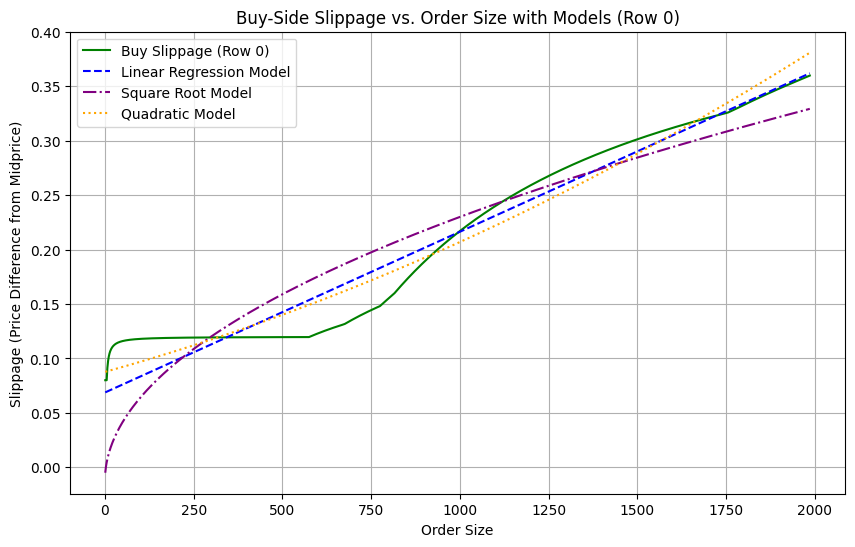

--- Sell Side (Row 0) ---
Linear Model - MSE: 0.000035, R-squared: 0.954932
Square Root Model - MSE: 0.000107, R-squared: 0.862457
Quadratic Model - MSE: 0.000027, R-squared: 0.965388


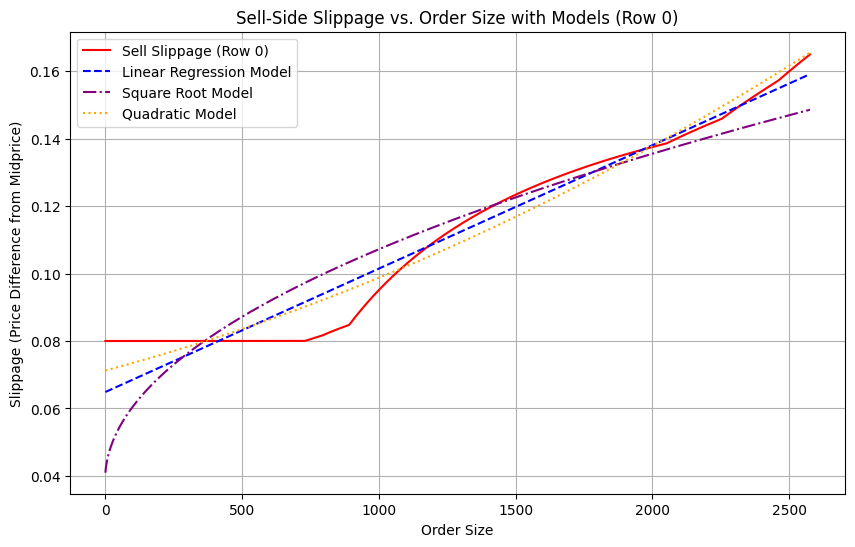

In [81]:
model_impact_models(minute_data_CRWV_2025Apr03, 0, 'buy', plot_models=True)
model_impact_models(minute_data_CRWV_2025Apr03, 0, 'sell', plot_models=True)
print()

Another example

--- Buy Side (Row 200) ---
Linear Model - MSE: 0.001321, R-squared: 0.385450
Square Root Model - MSE: 0.000944, R-squared: 0.561170
Quadratic Model - MSE: 0.000747, R-squared: 0.652462


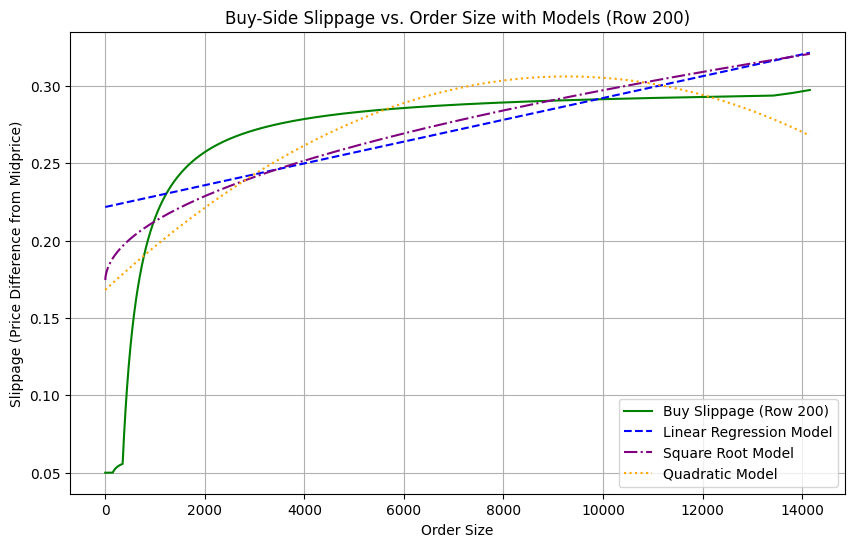

--- Sell Side (Row 200) ---
Linear Model - MSE: 0.000104, R-squared: 0.955994
Square Root Model - MSE: 0.000033, R-squared: 0.985858
Quadratic Model - MSE: 0.000019, R-squared: 0.991776


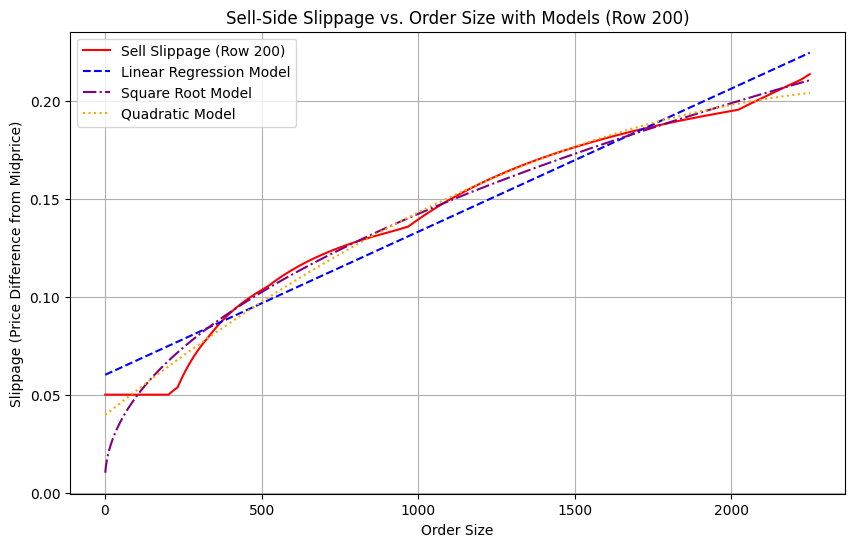

In [84]:
model_impact_models(minute_data_CRWV_2025Apr03, 200, 'buy', plot_models=True)
model_impact_models(minute_data_CRWV_2025Apr03, 200, 'sell', plot_models=True)
print()

## Model Comparison


In [86]:
mse_linear_sum = r2_linear_sum = mse_sqrt_sum = r2_sqrt_sum = mse_quad_sum = r2_quad_sum = 0

print("In progress",end="")

for i in range(390):

  mse_linear, r2_linear, mse_sqrt, r2_sqrt, mse_quad, r2_quad = model_impact_models(minute_data_CRWV_2025Apr03, i, 'buy', plot_models=False)
  mse_linear_sum += mse_linear
  r2_linear_sum += r2_linear
  mse_sqrt_sum += mse_sqrt
  r2_sqrt_sum += r2_sqrt
  mse_quad_sum += mse_quad
  r2_quad_sum += r2_quad

  if (i + 1) % 39 == 0:
      print(".",end="")

print("Done")

# Print the averages
print("\n")
print("Average MSE for Linear Model:", mse_linear_sum / 390)
print("Average R-squared for Linear Model:", r2_linear_sum / 390)

print("\n")
print("Average MSE for Square Root Model:", mse_sqrt_sum / 390)
print("Average R-squared for Square Root Model:", r2_sqrt_sum / 390)

print("\n")
print("Average MSE for Quadratic Model:", mse_quad_sum / 390)
print("Average R-squared for Quadratic Model:", r2_quad_sum / 390)

In progress..........Done


Average MSE for Linear Model: 0.0006361362941053343
Average R-squared for Linear Model: 0.8589194604142009


Average MSE for Square Root Model: 0.0006196886700082176
Average R-squared for Square Root Model: 0.8407016069262099


Average MSE for Quadratic Model: 0.00019825715165722616
Average R-squared for Quadratic Model: 0.9387623200402473
